In [3]:
train1 = np.load("canny_features_age_train.npy")
test1 = np.load("canny_features_age_test.npy")

In [2]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import shutil
import random
from sklearn.metrics import confusion_matrix
import cv2

In [4]:
def class_labels(age):
    if 1 <= age <= 4:
        return 0
    elif 5 <= age <= 11:
        return 1
    elif 12 <= age <= 18:
        return 2
    elif 19 <= age <= 34:
        return 3
    elif 35 <= age <= 44:
        return 4
    elif 45 <= age <= 64:
        return 5
    else:
        return 6

In [5]:
feature_names = pd.read_csv("canny_features_names.csv")
feature_names

,canny_edge_features
0,sec1_mean
1,sec1_std
2,sec2_mean
3,sec2_std
4,sec3_mean
...,...
796,sec399_mean
797,sec399_std
798,sec400_mean
799,sec400_std


In [6]:
train_df1 = pd.DataFrame(train1, columns=feature_names["canny_edge_features"])
test_df1 = pd.DataFrame(test1, columns=feature_names["canny_edge_features"])


In [145]:
cor_matrix = train_df1.corr().abs()

In [146]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [147]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

In [148]:
print(to_drop)

['sec1_std', 'sec2_std', 'sec3_std', 'sec4_std', 'sec5_std', 'sec6_std', 'sec7_std', 'sec8_std', 'sec9_std', 'sec10_std', 'sec11_std', 'sec12_std', 'sec13_std', 'sec14_std', 'sec15_std', 'sec16_std', 'sec17_std', 'sec18_std', 'sec19_std', 'sec20_std', 'sec21_std', 'sec22_std', 'sec23_std', 'sec24_std', 'sec25_std', 'sec26_std', 'sec27_std', 'sec28_std', 'sec29_std', 'sec30_std', 'sec31_std', 'sec32_std', 'sec33_std', 'sec34_std', 'sec35_std', 'sec36_std', 'sec37_std', 'sec38_std', 'sec39_std', 'sec40_std', 'sec41_std', 'sec42_std', 'sec43_std', 'sec44_std', 'sec45_std', 'sec46_std', 'sec47_std', 'sec48_std', 'sec49_std', 'sec50_std', 'sec51_std', 'sec52_std', 'sec53_std', 'sec54_std', 'sec55_std', 'sec56_std', 'sec57_std', 'sec58_std', 'sec59_std', 'sec60_std', 'sec61_std', 'sec62_std', 'sec63_std', 'sec64_std', 'sec65_std', 'sec66_std', 'sec67_std', 'sec68_std', 'sec69_std', 'sec70_std', 'sec71_std', 'sec72_std', 'sec73_std', 'sec74_std', 'sec75_std', 'sec76_std', 'sec77_std', 'sec78_

In [7]:
train_df1.shape

(6844, 801)

In [8]:
train_df1=train_df1.drop(['sec1_std', 'sec2_std', 'sec3_std', 'sec4_std', 'sec5_std', 'sec6_std', 'sec7_std', 'sec8_std', 'sec9_std', 'sec10_std', 'sec11_std', 'sec12_std', 'sec13_std', 'sec14_std', 'sec15_std', 'sec16_std', 'sec17_std', 'sec18_std', 'sec19_std', 'sec20_std', 'sec21_std', 'sec22_std', 'sec23_std', 'sec24_std', 'sec25_std', 'sec26_std', 'sec27_std', 'sec28_std', 'sec29_std', 'sec30_std', 'sec31_std', 'sec32_std', 'sec33_std', 'sec34_std', 'sec35_std', 'sec36_std', 'sec37_std', 'sec38_std', 'sec39_std', 'sec40_std', 'sec41_std', 'sec42_std', 'sec43_std', 'sec44_std', 'sec45_std', 'sec46_std', 'sec47_std', 'sec48_std', 'sec49_std', 'sec50_std', 'sec51_std', 'sec52_std', 'sec53_std', 'sec54_std', 'sec55_std', 'sec56_std', 'sec57_std', 'sec58_std', 'sec59_std', 'sec60_std', 'sec61_std', 'sec62_std', 'sec63_std', 'sec64_std', 'sec65_std', 'sec66_std', 'sec67_std', 'sec68_std', 'sec69_std', 'sec70_std', 'sec71_std', 'sec72_std', 'sec73_std', 'sec74_std', 'sec75_std', 'sec76_std', 'sec77_std', 'sec78_std', 'sec79_std', 'sec80_std', 'sec81_std', 'sec82_std', 'sec83_std', 'sec84_std', 'sec85_std', 'sec86_std', 'sec87_std', 'sec88_std', 'sec89_std', 'sec90_std', 'sec91_std', 'sec92_std', 'sec93_std', 'sec94_std', 'sec95_std', 'sec96_std', 'sec97_std', 'sec98_std', 'sec99_std', 'sec100_std', 'sec101_std', 'sec102_std', 'sec103_std', 'sec104_std', 'sec105_std', 'sec106_std', 'sec107_std', 'sec108_std', 'sec109_std', 'sec110_std', 'sec111_std', 'sec112_std', 'sec113_std', 'sec114_std', 'sec115_std', 'sec116_std', 'sec117_std', 'sec118_std', 'sec119_std', 'sec120_std', 'sec121_std', 'sec122_std', 'sec123_std', 'sec124_std', 'sec125_std', 'sec126_std', 'sec127_std', 'sec128_std', 'sec129_std', 'sec130_std', 'sec131_std', 'sec132_std', 'sec133_std', 'sec134_std', 'sec135_std', 'sec136_std', 'sec137_std', 'sec138_std', 'sec139_std', 'sec140_std', 'sec141_std', 'sec142_std', 'sec143_std', 'sec144_std', 'sec145_std', 'sec146_std', 'sec147_std', 'sec148_std', 'sec149_std', 'sec150_std', 'sec151_std', 'sec152_std', 'sec153_std', 'sec154_std', 'sec155_std', 'sec156_std', 'sec157_std', 'sec158_std', 'sec159_std', 'sec160_std', 'sec161_std', 'sec162_std', 'sec163_std', 'sec164_std', 'sec165_std', 'sec166_std', 'sec167_std', 'sec168_std', 'sec169_std', 'sec170_std', 'sec171_std', 'sec172_std', 'sec173_std', 'sec174_std', 'sec175_std', 'sec176_std', 'sec177_std', 'sec178_std', 'sec179_std', 'sec180_std', 'sec181_std', 'sec182_std', 'sec183_std', 'sec184_std', 'sec185_std', 'sec186_std', 'sec187_std', 'sec188_std', 'sec189_std', 'sec190_std', 'sec191_std', 'sec192_std', 'sec193_std', 'sec194_std', 'sec195_std', 'sec196_std', 'sec197_std', 'sec198_std', 'sec199_std', 'sec200_std', 'sec201_std', 'sec202_std', 'sec203_std', 'sec204_std', 'sec205_std', 'sec206_std', 'sec207_std', 'sec208_std', 'sec209_std', 'sec210_std', 'sec211_std', 'sec212_std', 'sec213_std', 'sec214_std', 'sec215_std', 'sec216_std', 'sec217_std', 'sec218_std', 'sec219_std', 'sec220_std', 'sec221_std', 'sec222_std', 'sec223_std', 'sec224_std', 'sec225_std', 'sec226_std', 'sec227_std', 'sec228_std', 'sec229_std', 'sec230_std', 'sec231_std', 'sec232_std', 'sec233_std', 'sec234_std', 'sec235_std', 'sec236_std', 'sec237_std', 'sec238_std', 'sec239_std', 'sec240_std', 'sec241_std', 'sec242_std', 'sec243_std', 'sec244_std', 'sec245_std', 'sec246_std', 'sec247_std', 'sec248_std', 'sec249_std', 'sec250_std', 'sec251_std', 'sec252_std', 'sec253_std', 'sec254_std', 'sec255_std', 'sec256_std', 'sec257_std', 'sec258_std', 'sec259_std', 'sec260_std', 'sec261_std', 'sec262_std', 'sec263_std', 'sec264_std', 'sec265_std', 'sec266_std', 'sec267_std', 'sec268_std', 'sec269_std', 'sec270_std', 'sec271_std', 'sec272_std', 'sec273_std', 'sec274_std', 'sec275_std', 'sec276_std', 'sec277_std', 'sec278_std', 'sec279_std', 'sec280_std', 'sec281_std', 'sec282_std', 'sec283_std', 'sec284_std', 'sec285_std', 'sec286_std', 'sec287_std', 'sec288_std', 'sec289_std', 'sec290_std', 'sec291_std', 'sec292_std', 'sec293_std', 'sec294_std', 'sec295_std', 'sec296_std', 'sec297_std', 'sec298_std', 'sec299_std', 'sec300_std', 'sec301_std', 'sec302_std', 'sec303_std', 'sec304_std', 'sec305_std', 'sec306_std', 'sec307_std', 'sec308_std', 'sec309_std', 'sec310_std', 'sec311_std', 'sec312_std', 'sec313_std', 'sec314_std', 'sec315_std', 'sec316_std', 'sec317_std', 'sec318_std', 'sec319_std', 'sec320_std', 'sec321_std', 'sec322_std', 'sec323_std', 'sec324_std', 'sec325_std', 'sec326_std', 'sec327_std', 'sec328_std', 'sec329_std', 'sec330_std', 'sec331_std', 'sec332_std', 'sec333_std', 'sec334_std', 'sec335_std', 'sec336_std', 'sec337_std', 'sec338_std', 'sec339_std', 'sec340_std', 'sec341_std', 'sec342_std', 'sec343_std', 'sec344_std', 'sec345_std', 'sec346_std', 'sec347_std', 'sec348_std', 'sec349_std', 'sec350_std', 'sec351_std', 'sec352_std', 'sec353_std', 'sec354_std', 'sec355_std', 'sec356_std', 'sec357_std', 'sec358_std', 'sec359_std', 'sec360_std', 'sec361_std', 'sec362_std', 'sec363_std', 'sec364_std', 'sec365_std', 'sec366_std', 'sec367_std', 'sec368_std', 'sec369_std', 'sec370_std', 'sec371_std', 'sec372_std', 'sec373_std', 'sec374_std', 'sec375_std', 'sec376_std', 'sec377_std', 'sec378_std', 'sec379_std', 'sec380_std', 'sec381_std', 'sec382_std', 'sec383_std', 'sec384_std', 'sec385_std', 'sec386_std', 'sec387_std', 'sec388_std', 'sec389_std', 'sec390_std', 'sec391_std', 'sec392_std', 'sec393_std', 'sec394_std', 'sec395_std', 'sec396_std', 'sec397_std', 'sec398_std', 'sec399_std', 'sec400_std'], axis=1)

In [9]:
train_df1.shape

(6844, 401)

In [10]:
test_df1=test_df1.drop(['sec1_std', 'sec2_std', 'sec3_std', 'sec4_std', 'sec5_std', 'sec6_std', 'sec7_std', 'sec8_std', 'sec9_std', 'sec10_std', 'sec11_std', 'sec12_std', 'sec13_std', 'sec14_std', 'sec15_std', 'sec16_std', 'sec17_std', 'sec18_std', 'sec19_std', 'sec20_std', 'sec21_std', 'sec22_std', 'sec23_std', 'sec24_std', 'sec25_std', 'sec26_std', 'sec27_std', 'sec28_std', 'sec29_std', 'sec30_std', 'sec31_std', 'sec32_std', 'sec33_std', 'sec34_std', 'sec35_std', 'sec36_std', 'sec37_std', 'sec38_std', 'sec39_std', 'sec40_std', 'sec41_std', 'sec42_std', 'sec43_std', 'sec44_std', 'sec45_std', 'sec46_std', 'sec47_std', 'sec48_std', 'sec49_std', 'sec50_std', 'sec51_std', 'sec52_std', 'sec53_std', 'sec54_std', 'sec55_std', 'sec56_std', 'sec57_std', 'sec58_std', 'sec59_std', 'sec60_std', 'sec61_std', 'sec62_std', 'sec63_std', 'sec64_std', 'sec65_std', 'sec66_std', 'sec67_std', 'sec68_std', 'sec69_std', 'sec70_std', 'sec71_std', 'sec72_std', 'sec73_std', 'sec74_std', 'sec75_std', 'sec76_std', 'sec77_std', 'sec78_std', 'sec79_std', 'sec80_std', 'sec81_std', 'sec82_std', 'sec83_std', 'sec84_std', 'sec85_std', 'sec86_std', 'sec87_std', 'sec88_std', 'sec89_std', 'sec90_std', 'sec91_std', 'sec92_std', 'sec93_std', 'sec94_std', 'sec95_std', 'sec96_std', 'sec97_std', 'sec98_std', 'sec99_std', 'sec100_std', 'sec101_std', 'sec102_std', 'sec103_std', 'sec104_std', 'sec105_std', 'sec106_std', 'sec107_std', 'sec108_std', 'sec109_std', 'sec110_std', 'sec111_std', 'sec112_std', 'sec113_std', 'sec114_std', 'sec115_std', 'sec116_std', 'sec117_std', 'sec118_std', 'sec119_std', 'sec120_std', 'sec121_std', 'sec122_std', 'sec123_std', 'sec124_std', 'sec125_std', 'sec126_std', 'sec127_std', 'sec128_std', 'sec129_std', 'sec130_std', 'sec131_std', 'sec132_std', 'sec133_std', 'sec134_std', 'sec135_std', 'sec136_std', 'sec137_std', 'sec138_std', 'sec139_std', 'sec140_std', 'sec141_std', 'sec142_std', 'sec143_std', 'sec144_std', 'sec145_std', 'sec146_std', 'sec147_std', 'sec148_std', 'sec149_std', 'sec150_std', 'sec151_std', 'sec152_std', 'sec153_std', 'sec154_std', 'sec155_std', 'sec156_std', 'sec157_std', 'sec158_std', 'sec159_std', 'sec160_std', 'sec161_std', 'sec162_std', 'sec163_std', 'sec164_std', 'sec165_std', 'sec166_std', 'sec167_std', 'sec168_std', 'sec169_std', 'sec170_std', 'sec171_std', 'sec172_std', 'sec173_std', 'sec174_std', 'sec175_std', 'sec176_std', 'sec177_std', 'sec178_std', 'sec179_std', 'sec180_std', 'sec181_std', 'sec182_std', 'sec183_std', 'sec184_std', 'sec185_std', 'sec186_std', 'sec187_std', 'sec188_std', 'sec189_std', 'sec190_std', 'sec191_std', 'sec192_std', 'sec193_std', 'sec194_std', 'sec195_std', 'sec196_std', 'sec197_std', 'sec198_std', 'sec199_std', 'sec200_std', 'sec201_std', 'sec202_std', 'sec203_std', 'sec204_std', 'sec205_std', 'sec206_std', 'sec207_std', 'sec208_std', 'sec209_std', 'sec210_std', 'sec211_std', 'sec212_std', 'sec213_std', 'sec214_std', 'sec215_std', 'sec216_std', 'sec217_std', 'sec218_std', 'sec219_std', 'sec220_std', 'sec221_std', 'sec222_std', 'sec223_std', 'sec224_std', 'sec225_std', 'sec226_std', 'sec227_std', 'sec228_std', 'sec229_std', 'sec230_std', 'sec231_std', 'sec232_std', 'sec233_std', 'sec234_std', 'sec235_std', 'sec236_std', 'sec237_std', 'sec238_std', 'sec239_std', 'sec240_std', 'sec241_std', 'sec242_std', 'sec243_std', 'sec244_std', 'sec245_std', 'sec246_std', 'sec247_std', 'sec248_std', 'sec249_std', 'sec250_std', 'sec251_std', 'sec252_std', 'sec253_std', 'sec254_std', 'sec255_std', 'sec256_std', 'sec257_std', 'sec258_std', 'sec259_std', 'sec260_std', 'sec261_std', 'sec262_std', 'sec263_std', 'sec264_std', 'sec265_std', 'sec266_std', 'sec267_std', 'sec268_std', 'sec269_std', 'sec270_std', 'sec271_std', 'sec272_std', 'sec273_std', 'sec274_std', 'sec275_std', 'sec276_std', 'sec277_std', 'sec278_std', 'sec279_std', 'sec280_std', 'sec281_std', 'sec282_std', 'sec283_std', 'sec284_std', 'sec285_std', 'sec286_std', 'sec287_std', 'sec288_std', 'sec289_std', 'sec290_std', 'sec291_std', 'sec292_std', 'sec293_std', 'sec294_std', 'sec295_std', 'sec296_std', 'sec297_std', 'sec298_std', 'sec299_std', 'sec300_std', 'sec301_std', 'sec302_std', 'sec303_std', 'sec304_std', 'sec305_std', 'sec306_std', 'sec307_std', 'sec308_std', 'sec309_std', 'sec310_std', 'sec311_std', 'sec312_std', 'sec313_std', 'sec314_std', 'sec315_std', 'sec316_std', 'sec317_std', 'sec318_std', 'sec319_std', 'sec320_std', 'sec321_std', 'sec322_std', 'sec323_std', 'sec324_std', 'sec325_std', 'sec326_std', 'sec327_std', 'sec328_std', 'sec329_std', 'sec330_std', 'sec331_std', 'sec332_std', 'sec333_std', 'sec334_std', 'sec335_std', 'sec336_std', 'sec337_std', 'sec338_std', 'sec339_std', 'sec340_std', 'sec341_std', 'sec342_std', 'sec343_std', 'sec344_std', 'sec345_std', 'sec346_std', 'sec347_std', 'sec348_std', 'sec349_std', 'sec350_std', 'sec351_std', 'sec352_std', 'sec353_std', 'sec354_std', 'sec355_std', 'sec356_std', 'sec357_std', 'sec358_std', 'sec359_std', 'sec360_std', 'sec361_std', 'sec362_std', 'sec363_std', 'sec364_std', 'sec365_std', 'sec366_std', 'sec367_std', 'sec368_std', 'sec369_std', 'sec370_std', 'sec371_std', 'sec372_std', 'sec373_std', 'sec374_std', 'sec375_std', 'sec376_std', 'sec377_std', 'sec378_std', 'sec379_std', 'sec380_std', 'sec381_std', 'sec382_std', 'sec383_std', 'sec384_std', 'sec385_std', 'sec386_std', 'sec387_std', 'sec388_std', 'sec389_std', 'sec390_std', 'sec391_std', 'sec392_std', 'sec393_std', 'sec394_std', 'sec395_std', 'sec396_std', 'sec397_std', 'sec398_std', 'sec399_std', 'sec400_std'],axis=1)

In [11]:
test_df1.shape

(2934, 401)

In [12]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [13]:
train_df1['age'] = train_df1['age'].astype(np.uint8)
test_df1['age'] = test_df1['age'].astype(np.uint8)

In [14]:
train_df1['target'] = train_df1['age'].map(class_labels)
test_df1['target'] = test_df1['age'].map(class_labels)

In [15]:
X_train2 = train_df1.drop(columns=['age', 'target'])
y_train2 = train_df1['target']

X_test2 = test_df1.drop(columns=['age', 'target'])
y_test2 = test_df1['target']

In [16]:
# Scaling X_train to the standard scale.
ss = StandardScaler()
X_train_sc1 = ss.fit_transform(X_train2)

In [17]:
X_test_sc1 = ss.transform(X_test2)

In [18]:
# try cnn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
from zipfile import ZipFile
import time
from datetime import datetime
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [19]:
X_train_sc1.shape

(6844, 400)

In [20]:
X_test_sc1.shape

(2934, 400)

In [21]:
X_train_2 = np.reshape(X_train_sc1, (X_train_sc1.shape[0], 20, 20))
X_train_2.shape

(6844, 20, 20)

In [22]:
X_test_2 = np.reshape(X_test_sc1, (X_test_sc1.shape[0], 20, 20))
X_test_2.shape

(2934, 20, 20)

In [23]:
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization

In [38]:
# Defining the architecture of the sequential neural network.

final_cnn = Sequential()

# Input layer with 32 filters, followed by an AveragePooling2D layer.
final_cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_test_2.shape[1], X_test_2.shape[2]))) 
final_cnn.add(BatchNormalization())   # 3rd dim = 1 for grayscale images.
final_cnn.add(MaxPooling1D(1))

# Three Conv2D layers with filters increasing by a factor of 2 for every successive Conv2D layer.
final_cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
final_cnn.add(BatchNormalization())
final_cnn.add(MaxPooling1D(1))
final_cnn.add(Dropout(rate=0.2))

final_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
final_cnn.add(BatchNormalization())
final_cnn.add(MaxPooling1D(1))
final_cnn.add(Dropout(rate=0.2))

final_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
final_cnn.add(BatchNormalization())
final_cnn.add(MaxPooling1D(1))
final_cnn.add(Dropout(rate=0.2))

final_cnn.add(Flatten())
# A GlobalAveragePooling2D layer before going into Dense layers below.
# GlobalAveragePooling2D layer gives no. of outputs equal to no. of filters in last Conv2D layer above (256).
# One Dense layer with 132 nodes so as to taper down the no. of nodes from no. of outputs of GlobalAveragePooling2D layer above towards no. of nodes in output layer below (7).
final_cnn.add(Dense(64, activation='relu'))
final_cnn.add(Dropout(rate=0.2))

final_cnn.add(Dense(7, activation='sigmoid'))

final_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 19, 32)            1312      
                                                                 
 batch_normalization_4 (Batc  (None, 19, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 19, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 18, 32)            2080      
                                                                 
 batch_normalization_5 (Batc  (None, 18, 32)           128       
 hNormalization)                                                 
                                                      

In [39]:
learning_rate=0.001
#batch_size=40
epochs = 25

In [40]:
from tensorflow.keras.optimizers import SGD,Adam

In [41]:
optimizer = Adam(learning_rate=0.001)
#model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
final_cnn.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=[keras.metrics.AUC(name='auc')])

In [42]:
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.0001,patience = 1, mode = 'min', verbose = 1,
                           restore_best_weights = True)
# 

In [43]:
from tensorflow import keras

In [44]:
from sklearn.preprocessing import LabelBinarizer

y_train_multi = LabelBinarizer().fit_transform(y_train2)
y_train_multi

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [45]:
y_test_multi = LabelBinarizer().fit_transform(y_test2)
y_test_multi[0]

array([0, 1, 0, 0, 0, 0, 0])

In [46]:
history = final_cnn.fit(X_train_2, y_train_multi, epochs=10, batch_size=50,validation_split=0.2,callbacks = [early_stop])

Epoch 1/10
110/110 [==============================] - 3s 14ms/step - loss: 0.4975 - auc: 0.6531 - val_loss: 0.3592 - val_auc: 0.7511
Epoch 2/10
110/110 [==============================] - 1s 11ms/step - loss: 0.3529 - auc: 0.7776 - val_loss: 0.3097 - val_auc: 0.8255
Epoch 3/10
110/110 [==============================] - 1s 10ms/step - loss: 0.3159 - auc: 0.8256 - val_loss: 0.2960 - val_auc: 0.8453
Epoch 4/10
110/110 [==============================] - 1s 12ms/step - loss: 0.2962 - auc: 0.8497 - val_loss: 0.2904 - val_auc: 0.8549
Epoch 5/10
110/110 [==============================] - 1s 10ms/step - loss: 0.2811 - auc: 0.8669 - val_loss: 0.2868 - val_auc: 0.8598
Epoch 6/10
110/110 [==============================] - 1s 10ms/step - loss: 0.2723 - auc: 0.8780 - val_loss: 0.2860 - val_auc: 0.8613
Epoch 7/10
110/110 [==============================] - 1s 11ms/step - loss: 0.2631 - auc: 0.8871 - val_loss: 0.2811 - val_auc: 0.8666
Epoch 8/10
110/110 [==============================] - 1s 10ms/step - 

In [206]:
final_cnn.save("sip_project_load_model_corr_0.9")

INFO:tensorflow:Assets written to: sip_project_load_model_corr_0.9\assets


In [33]:
final_cnn = keras.models.load_model("sip_project_load_model_corr_0.9")

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [35]:
test_results = final_cnn.evaluate(X_test_2, y_test_multi, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

92/92 [==============================] - 5s 4ms/step - loss: 0.2798 - auc: 0.8683
Test results - Loss: 0.27976295351982117 - Accuracy: 86.82681918144226%


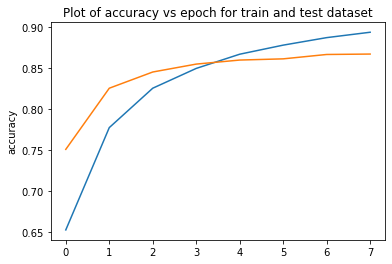

In [47]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
#plt.xlabel('epoch')
plt.show()

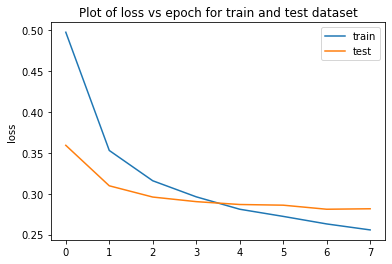

In [48]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [49]:
import sklearn.metrics

In [50]:
predict_x=final_cnn.predict(X_test_2) 
classes_x=np.argmax(predict_x,axis=1)

In [51]:
classes_x

array([3, 5, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import plot_confusion_matrix

In [53]:
rounded_labels=np.argmax(y_test_multi, axis=1)
rounded_labels

array([1, 5, 0, ..., 5, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix  
cmsvm= confusion_matrix(rounded_labels,classes_x)
cmsvm

array([[522,  50,   5,  35,  10,  12,   5],
       [ 70, 108,  31,  67,   9,  19,   2],
       [ 14,  47,  41, 131,  13,  33,   8],
       [ 16,  32,  23, 427,  44,  68,   7],
       [  9,   8,   9,  88,  46,  88,   9],
       [ 10,  14,  17, 105,  40, 243,  66],
       [  7,   6,   0,  37,   9, 101, 173]], dtype=int64)

In [55]:
details={'age_range' : ['1-4', '5-11', '12-18', '19-34', '35-44', '45-64', '65-110']}
df = pd.DataFrame(details)
df

,age_range
0,1-4
1,5-11
2,12-18
3,19-34
4,35-44
5,45-64
6,65-110


In [56]:
cm_plot_labels = df['age_range']

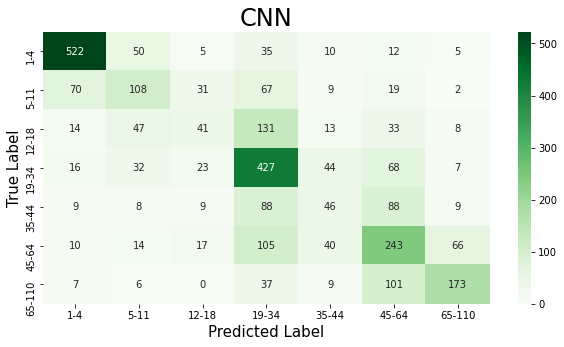

In [57]:
import seaborn as sns
plt.figure(figsize = (10,5))
plt.xlabel = "Predicted label"
x_axis_labels= ['1-4', '5-11', '12-18', '19-34', '35-44','45-64','65-110']
y_axis_labels=['1-4', '5-11', '12-18', '19-34', '35-44','45-64','65-110']

ax=sns.heatmap(cmsvm,annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels,fmt='', cmap="Greens");
ax.set(ylabel="True Label", xlabel="Predicted Label")
ax.set_title( "CNN" , size = 24 )
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

In [58]:
test_df = pd.read_csv("images_filenames_labels_test.csv")
train_df = pd.read_csv("images_filenames_labels_train.csv")

In [59]:
test_df

,filepaths,age,target
0,face_age\009\1693.png,9,1
1,face_age\056\2723.png,56,5
2,face_age\001\9456.png,1,0
3,face_age\068\3688.png,68,6
4,face_age\052\2153.png,52,5
...,...,...,...
2929,face_age\030\904.png,30,3
2930,face_age\001\4732.png,1,0
2931,face_age\052\4300.png,52,5
2932,face_age\001\4038.png,1,0


In [60]:
test_df['predicted_label'] = classes_x

In [61]:
test_df

,filepaths,age,target,predicted_label
0,face_age\009\1693.png,9,1,3
1,face_age\056\2723.png,56,5,5
2,face_age\001\9456.png,1,0,0
3,face_age\068\3688.png,68,6,6
4,face_age\052\2153.png,52,5,5
...,...,...,...,...
2929,face_age\030\904.png,30,3,1
2930,face_age\001\4732.png,1,0,0
2931,face_age\052\4300.png,52,5,1
2932,face_age\001\4038.png,1,0,0


In [62]:
age_ranges=['1--4','5--11','12--18','19--34','35--44','45--64','65--110']
def age_range(predicted_label):
    if predicted_label == 0:
        return age_ranges[0]
    elif predicted_label ==1:
        return age_ranges[1]
    elif predicted_label == 2:
        return age_ranges[2]
    elif  predicted_label ==3 :
        return age_ranges[3]
    elif predicted_label ==4:
        return age_ranges[4]
    elif predicted_label ==5:
        return age_ranges[5]
    else:
        return age_ranges[6]

In [63]:
test_df['pred_range'] = test_df['predicted_label'].map(age_range)

In [64]:
test_df['original_range'] = test_df['target'].map(age_range)

In [65]:
test_df

,filepaths,age,target,predicted_label,pred_range,original_range
0,face_age\009\1693.png,9,1,3,19--34,5--11
1,face_age\056\2723.png,56,5,5,45--64,45--64
2,face_age\001\9456.png,1,0,0,1--4,1--4
3,face_age\068\3688.png,68,6,6,65--110,65--110
4,face_age\052\2153.png,52,5,5,45--64,45--64
...,...,...,...,...,...,...
2929,face_age\030\904.png,30,3,1,5--11,19--34
2930,face_age\001\4732.png,1,0,0,1--4,1--4
2931,face_age\052\4300.png,52,5,1,5--11,45--64
2932,face_age\001\4038.png,1,0,0,1--4,1--4


In [66]:
test_df['filepaths'][1]

'face_age\\056\\2723.png'

In [70]:
import cv2
image = cv2.imread(test_df['filepaths'][1],0)
print("original age",test_df['original_range'][1])
print("predicted age range",test_df['pred_range'][1])
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', image)
cv2.waitKey(0)

original age 45--64
predicted age range 45--64


-1